# SYD DAT 6 Homework 2 - Visualisation, Regression and Classification

## Homework - Due Monday 14th November 2016

All responses should be written in markdown or code in this document.

----

#### Setup
## [DONE]
* Signup for an AWS account

#### Python Programming Skills
* Complete all the labs
* Experiment with tutorials 1 & 2 from https://github.com/fonnesbeck/statistical-analysis-python-tutorial
* Referring to the prior labs perform some simple analysis of the titanic.csv dataset using python
    * Load the data set titanic.csv
    * Produce 1 simple visualisation with matplotlib/seaborn/pandas visualisation libraries to show the distribution of ages
    * How many male 3rd class passengers survived and how many did not survive
    * How many female 1st class passengers survived and how many did not survive
    * Produce a table grouped by class that shows:
        * Percent survived
        * Average fare

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ggplot import *
plt.style.use('ggplot')


titanic = pd.read_csv('titanic.csv', index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


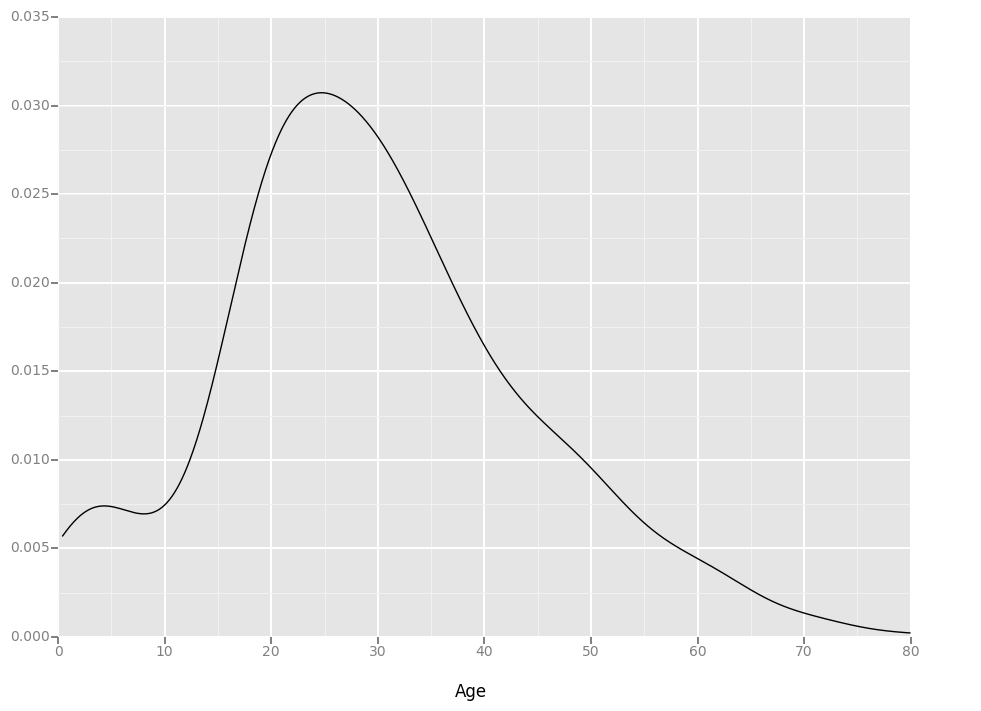

<ggplot: (273681309)>

In [2]:
#titanic.Age.value_counts().plot(kind='bar', title='Titanic Age Distribution')
#plt.xlabel('Age')
#plt.ylabel('Count')
ggplot(titanic, aes(x='Age')) + geom_density()

In [3]:
#Let's try a table
titanic.Age.value_counts()
#Table too big, grouped into age groups
titanic.Age.groupby(pd.cut(titanic["Age"], np.arange(0, 1.0+80, 5))).count()

Age
(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: Age, dtype: int64

In [4]:
#How many male 3rd class passengers survived and how many did not survive
titanic[(titanic.Sex == 'male') & (titanic.Pclass == 3)].Survived.value_counts()

0    300
1     47
Name: Survived, dtype: int64

In [5]:
#How many female 1st class passengers survived and how many did not survive
titanic[(titanic.Sex == 'female') & (titanic.Pclass == 1)].Survived.value_counts()

1    91
0     3
Name: Survived, dtype: int64

In [6]:
#Produce a table grouped by class that shows: Percent survived & Average fare
titanic.groupby(['Pclass'])['Fare'].mean()
titanic.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### Machine Learning Theory
## [Done]
* Reading that was required during the course from Introduction to Statistical Learning
    * Chapter 3 - Linear Regression
    * Chapter 4 - 4.1, 4.2, 4.3  - Classification
    * Chapter 5 - 5.1 - Cross Validation
    * Chapter 6 - 6.1, 6.2, 6.3 - Dimensionality
* Complete all the labs
* Describe what technique you might apply to predict whether a person has AIDs. What could you do to reduce the probability that the solution mistakenly predicts that a person does not have AIDs, when in fact they do?

You could apply a Logistic Regression analysis to classify whether someone has aids, using cross validation methods to make sure the the model is accurate. 

#### Visualisation
## [DONE]
* Drawing from Keegan from Optus' talk, your own experience or any other source, describe what you believe are the 3 most important considerations in producing a visualisation.
* Name 3 types of plots you can think of to address each of the following situations:
    * Show the distribution of a single variable
    * Show a relationship between two variables
    * Compare two or more variables

### 3 Important Visualisation Considerations
* Knowing your audience is key, how little or how much will they understand - basic or complicated visuals,
* What questions are you trying to answer with your visualisation, and working out what kind of visualisation will get the message accross the best,
* What does the data say vs what do you want it to say and how to portray that.
### Plots
##### Show the distribution of a single variable
* Bar Graph
* Histogram
* Box plot
##### Show a relationship between two variables
* Scatter plot
* Bar graph
* Side-by-side box plots
##### Compare two or more variables
* Scatter Plot
* Side-by-side box plots
* Overlay plots

#### Communication
## [Done]
* Imagine you are trying to explain to someone what Linear Regression is - but they have no programming/maths experience? How would you explain the overall process, what R-Squared means and how to interpret the coefficients?
* Read the paper [Useful things to know about machine learning]( https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf). 
    * What have we covered so far from this paper? 
    * Explain sections 6-13 in your own words

### Linear Regression
"So you have a value that you want to predict, and you have a lot of data and information on what will inform that value. For example, you want to see if you can predict the price of a house based on number of bedrooms, bathrooms, and if it has a pool etc. We assume the price of the house is influenced by these characteristics and we want to try and define a linear relationship between these and the price. 
You can then measure how close the data is to this line with a value called "R-Squared". The higher R-Squared value is to 100%, the better the model fits the data.
Once you've done this, you can have a look at the data and see how much influence the variables (bed, bath, pool) have on the price of the house."

### Useful things to know about machine learning
* Covered so far:
    * Train/Test and Cross-validation
    * Overfitting
    * Bias and Variance
    * Dimentionality
    * Learn many models, not just one
    * Bagging
    * Boosting
* Sections 6-13
    * Section 6 describes the 'curse of dimentionality', namely how the more dimentions you add to a problem, the larger the resulting variations and the harder it becomes to design a good classifier.
    * Section 7 outlines use cases for theoretical guarantees, and that they should be taken with a grain of salt (because they are theoretical, and may not actually be the best application for the situation). "Just because a learner has a theoretical justification and works in practice, doesn't mean the former is the reason for the latter."
    * Section 8 reveals that the machine learning part actually takes up very little time. It's process of gathering data, integrating it, cleaning it, pre-processing it and trial and error that takes up a lot of the time. It is not simply a set and forget process, you also have to run the learner, analyse results, modify the data/learner and repeat.
    * Section 9 "A dumb algorithm with lots and lots of data beats a clever one with modest amounts of it." Machine learning is about letting the data do the heavy lifting, not the person.
    * Section 10 is about the perks of learning more than one model. Even better, if you can use combinations of models to improve processes, you can generally optimize results even futher.
    * Section 11 states that "simplicity does not imply accuracy" and that generally, simple hypothesis codes are more accurate because the prefrences are accurate, not the 'simple' hypothesis.
    * Section 12 says that just because a learner can represent functions effectively, that doesn't mean that it can learn them.
    * Section 13 implies that just because data correlates, doesn't mean it is causal, though it may be a good indicator that it could be and warrants further investigation. 

#### Course Project
## [Done]
* Set up a new github repository for your project.
    * If there is any sensitive data or material in your project, make it a private repository - but check with us first. For most of you this will not be necessary. Generally you would exclude data from git tracking - this can be achieved with the .gitignore file. Don't worry about excluding files from git if you are using smaller, public datasets.
    * Once you have established the github repository for your project, share the URL for the repository with Alasdair and Louis via Slack. If it is a private repository you will additionally need to give Alasdair and Louis permissions. 
* Load the data you have gathered for your project into Python and run some summary statistics over the data. Are there any interesting features of the data that jump out? (Include the code)
* Draft/Sketch on paper (or wireframe) some data visualisations that would be useful for you to explore your data set
* Are there any regression or clustering techniques you could use in your project? Write them down (with the corresponding scikit learn function) and what you think you would get out of it.

#### Data
* The basic idea behind my project is that healthy people are happy people. I'm exploring this further getting happiness and health and wellness indexes be country to see if this applies to countries as a whole.
    * The below dataset has 5 very simple values: the country, country code, Happiness Index (Source: World Happiness Data Report), amount spent on healthcare total in 2014 (Source: World Health Data), and life expectancy (Source: World Health Data).
    * The first thing that jumps out of the data is the correlation between the Happiness Index and Life Expectancy. At this point I think I'll need more data to make some more assumptions and correlations, but the problem is there is so much data out there on Health, I need to work out the best indications of a country's happiness.

##### Useful Data Visualisations
I have an idea of what I want to do with the data:
* First of all I will make some basic visualisations with different variables:
    * Scatter Graphs
    * Histograms
* Next, I'll work out the Y predictor (Happiness Index) I want to estimate and perform linear regression on the dataset, with the point being able to estimate how happy a country is given x values (haven't worked these out yet).
* Lastly, I would like to overlay the data in a heatmap style on a map of the earth, so that it is easily visible where happiness is clustered (hopefully obvious, but if not, try to explain why).

##### Regression or clustering
As above, linear regression could be useful to work out a happiness prediction based on country statistics. It might be possible to cluster countries based on development of the country (1st, 2nd, 3rd) or things like GDP, Population, size etc. (I have this data, but haven't yet worked out if it's useful).

In [31]:
happy = pd.read_csv('happiness.csv')
happy.head(10)

,country,code,happiness,health,life
0,Japan,JPN,5.921,4.706717e+11,83.59
1,Spain,ESP,6.361,1.236415e+11,83.08
2,Switzerland,CHE,7.509,7.865363e+10,82.85
3,Italy,ITA,5.977,1.980128e+11,82.69
4,Singapore,SGP,6.739,1.515589e+10,82.65
5,France,FRA,6.478,3.264751e+11,82.37
6,Australia,AUS,7.313,1.400353e+11,82.25
7,Luxembourg,LUX,6.871,4.467499e+09,82.21
8,Israel,ISR,7.267,2.375480e+10,82.15
9,Iceland,ISL,7.501,1.509256e+09,82.06


In [34]:
happy.describe()

,happiness,health,life
count,157.000000,1.350000e+02,138.000000
mean,5.382185,5.374209e+10,71.769928
std,1.141674,2.682757e+11,8.283723
min,2.905000,4.370584e+07,50.880000
25%,4.404000,1.020471e+09,65.665000
50%,5.314000,3.708896e+09,74.095000
75%,6.269000,1.980680e+10,77.772500
max,7.526000,2.985748e+12,83.590000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120036090>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120c342d0>]], dtype=object)

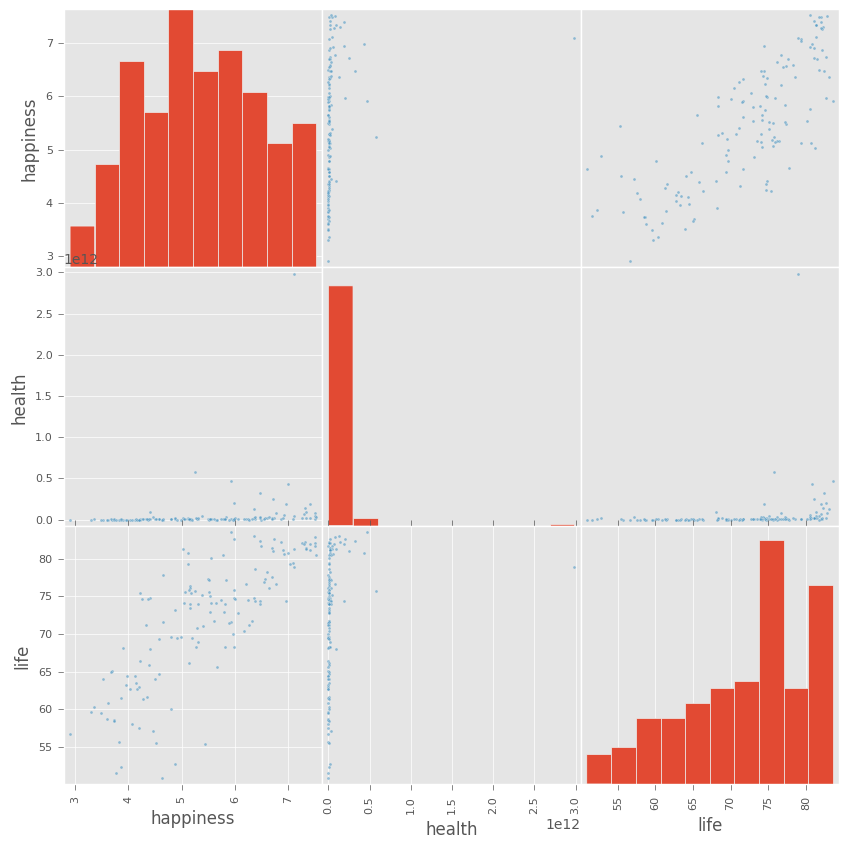

In [32]:
pd.scatter_matrix(happy, figsize=(10,10))

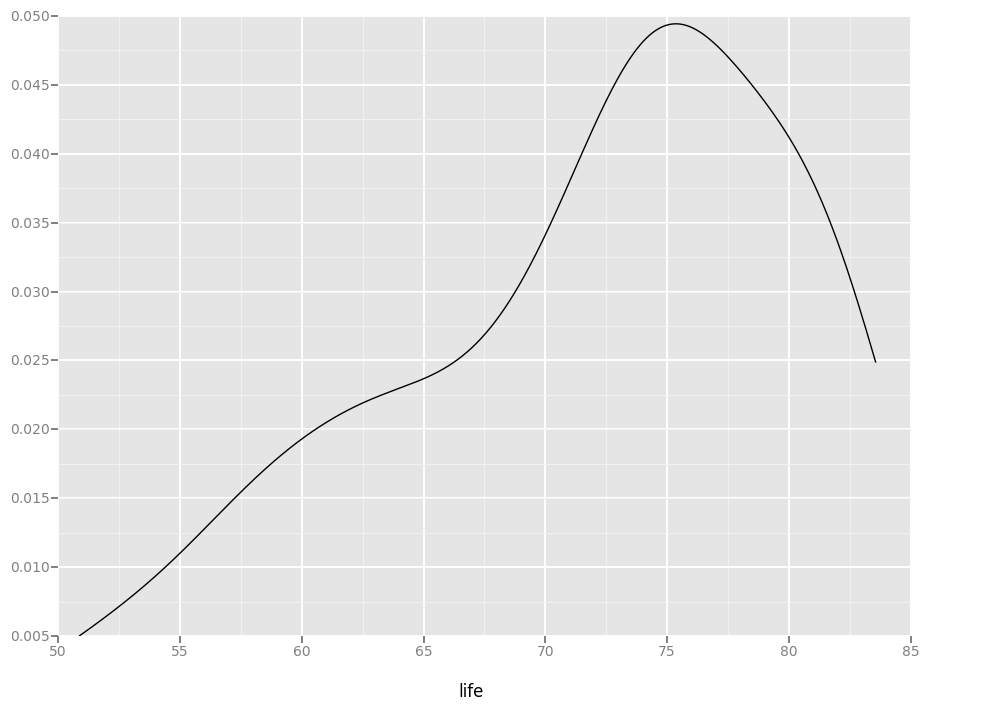

<ggplot: (303255121)>

In [35]:
ggplot(happy, aes(x='life')) + geom_density()
#ggplot(happy, aes(x='happiness')) + geom_density()
#ggplot(happy, aes(x='health')) + geom_density()